<a href="https://colab.research.google.com/github/nangira/Independent-Project/blob/main/Hypothesis_testing_Independent_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hypothesis Testing**

## **Introduction**

As a Data Scientist for the Autolib electric car-sharing service company, we are required to investigate a claim about the blue cars from the provided Autolib dataset.

In an effort to do this, we need to identify some areas and periods of interest via sampling stating the reason to the choice of method, then perform hypothesis testing with regards to the claim that we will have made. 

We will perform the following analysis with Python; 

1.   Find and deal with outliers, anomalies, and missing data within the dataset.
2.   Plot appropriate univariate and bivariate summaries recording our observations.
3.   Implement the solution by performing hypothesis testing.

This will need to be documented in the report.

In [1]:
# Loading the required dataset

import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading dataset

data = pd.read_csv('autolib_daily_events_postal_code.csv')

# Viewing first five entries
data.head()

# Viewing last five data entries
data.tail()

data['Postal code'].unique()

array([75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009,
       75010, 75011, 75012, 75013, 75014, 75015, 75016, 75017, 75018,
       75019, 75020, 75112, 75116, 78000, 78140, 78150, 91330, 91370,
       91400, 92000, 92100, 92110, 92120, 92130, 92140, 92150, 92160,
       92170, 92190, 92200, 92210, 92220, 92230, 92240, 92250, 92260,
       92270, 92290, 92300, 92310, 92320, 92330, 92340, 92350, 92360,
       92370, 92380, 92390, 92400, 92410, 92420, 92500, 92600, 92700,
       92800, 93100, 93110, 93130, 93150, 93170, 93200, 93230, 93260,
       93300, 93310, 93350, 93360, 93370, 93390, 93400, 93440, 93500,
       93600, 93700, 93800, 94000, 94100, 94110, 94120, 94130, 94140,
       94150, 94160, 94220, 94230, 94300, 94340, 94410, 94450, 94500,
       94700, 94800, 95100, 95870, 95880])

In [ ]:
# Familiarizing ourselves with the data
# Checking the data types, shape and if there's missing values
data.info()

# The variables are a mix of numerical and categorical variables
# There are no missing values in our dataset
# There are 16,085 entries and 13 columns in our dataset

# convert the 'date' column to datetime format
data['date']= pd.to_datetime(data['date'])

# Confirming the new data type for dates is saved
data['date'].dtype

## **Data Validation**

Below is a description of the variables in our dataset
**Postal code** - postal code of the area (in Paris)

**date** - date of the row aggregation

**n_daily_data_points** - number of daily data points that were available for aggregation, that day

**dayOfWeek** - identifier of weekday (0: Monday -> 6: Sunday)

**day_type** - weekday or weekend

**BlueCars_taken_sum** - Number of bluecars taken that date in that area

**BlueCars_returned_sum** - Number of bluecars returned that date in that area

**Utilib_taken_sum** - Number of Utilib taken that date in that area

**Utilib_returned_sum** - Number of Utilib returned that date in that area

**Utilib_14_taken_sum** - Number of Utilib 1.4 taken that date in that area

**Utilib_14_returned_sum** - Number of Utilib 1.4 returned that date in that area

**Slots_freed_sum** - Number of recharging slots released that date in that area

**Slots_taken_sum** - Number of rechargign slots taken that date in that area



### **Univariate Analysis**

In [4]:

# Observing our numerical variables

# Creating a list of all the numeric variables not including Postal code as it's a unique identifier
numeric_variables = data[['BlueCars_taken_sum','BlueCars_returned_sum', 'Utilib_taken_sum', 'Utilib_returned_sum',
                          'Utilib_14_taken_sum', 'Utilib_14_returned_sum', 'Slots_freed_sum', 'Slots_taken_sum']]

# The output shows the range for the numerical variables in the order they're listed in numeric_variables
range = numeric_variables.max() - numeric_variables.min()
print(range)

# Finding the mode of the numeric variables
print(numeric_variables.mode())

# Finding the mean, median, kurtosis, standard deviation, variance, maximum and minimum values of the numeric variables
numeric_variables.apply(["count","mean","std","var" ,"median", "max","min", "skew", "kurt"])


BlueCars_taken_sum        1352
BlueCars_returned_sum     1332
Utilib_taken_sum            54
Utilib_returned_sum         58
Utilib_14_taken_sum        100
Utilib_14_returned_sum     101
Slots_freed_sum            360
Slots_taken_sum            359
dtype: int64
   BlueCars_taken_sum  BlueCars_returned_sum  Utilib_taken_sum  \
0                  12                     13                 0   

   Utilib_returned_sum  Utilib_14_taken_sum  Utilib_14_returned_sum  \
0                    0                    0                       0   

   Slots_freed_sum  Slots_taken_sum  
0                0                0  


,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
var,34383.016113,34410.819414,33.814897,33.926364,165.639430,165.610979,2716.521850,2719.208431
median,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
max,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
skew,2.406355,2.412085,2.556872,2.578665,2.510924,2.511488,2.597406,2.596904
kurt,6.172692,6.186288,7.702362,7.936357,7.186815,7.185463,6.454514,6.442553


The output on the numeric variables shows us the count, mean, standard deviation, variance, median, maximum and minimum values, skewness and kurtosis measures.

All the variables have a **count** of 16,085 which confirms that there's no missing values. 

The **mean** represents the average of the data points recorded in each variable and is attained by dividing the sum of all values in a variable by the count (16,085). 

**Standard deviation** and **variance** are measures of dispersion. The closer the values are to zero, the more clustered the data points are around the mean else they are spread out. The higher the value, the more spread out they are.

The **median** represents the value in the middle once the data is arranged in ascending order.

The **mode** represents the value that occurred most times.

The **maximum** and **minimum** values are the highest and lowest recorded values in a variable

**Skewness** is a statistical measure of asymmetric distribution of data.  A negative skew indicates that the tail is on the left side of the distribution, which extends towards more negative values. A positive skew indicates that the tail is on the right side of the distribution, which extends towards more positive values. A value of zero indicates that there is no skewness in the distribution at all, meaning the distribution is perfectly symmetrical.

**Kurtosis** helps determine if the distribution is heavy-tailed compared to a normal distribution. The kurtosis of a normal distribution is 3. If a given distribution has a kurtosis greater than 3 then it is said to be leptokurtic, which means it tends to produce more outliers than the normal distribution. If it's less than 3, it means it tends to produce fewer and less extreme outliers than the normal distribution.

**Range** is an index of variability. When the range is more the group is more variable. The smaller the range the more homogeneous is the group.




In [5]:
# Calculating the interquantile range

interquantile_range = numeric_variables.quantile(.75) - numeric_variables.quantile(.25)
print(interquantile_range)

# Checking the 0.25,0.50 and 0.75 quantiles

quantiles = numeric_variables.quantile([.25,.5,.75])
quantiles
# The output shows the interquantile range and the 25th, 50th and 75th percentiles for the numeric variables

BlueCars_taken_sum        115.0
BlueCars_returned_sum     115.0
Utilib_taken_sum            4.0
Utilib_returned_sum         4.0
Utilib_14_taken_sum         9.0
Utilib_14_returned_sum      9.0
Slots_freed_sum             5.0
Slots_taken_sum             5.0
dtype: float64


,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0.25,20.0,20.0,0.0,0.0,1.0,1.0,0.0,0.0
0.50,46.0,46.0,1.0,1.0,3.0,3.0,0.0,0.0
0.75,135.0,135.0,4.0,4.0,10.0,10.0,5.0,5.0


The further the interquartile range is from 0, the more spread out the data points are. 

## **Exploratory Data Analysis**

In [6]:
# We shall check for outliers by using the interquantile range


# Replacing  the data points that lie outside of the lower and the upper bound with a NULL value.
q1 = data.quantile(.25)
q3 = data.quantile(.75)
IQR = q3 - q1
  
upper_bound = q3 + 1.5*IQR
lower_bound = q1 - 1.5*IQR 

for i in data:
  Q1 = data.quantile(.25)
  Q3 = data.quantile(.75)
  IQR = Q3 - Q1

  upper_boundary = Q3 + 1.5*IQR
  lower_boundary = Q1 - 1.5*IQR

print([upper_boundary,lower_boundary])

# making outliers null values

data.loc[data['BlueCars_taken_sum'] > 307.5] = np.nan
data.loc[data['BlueCars_returned_sum'] > 307.5] = np.nan
data.loc[data['Utilib_taken_sum'] > 10] = np.nan
data.loc[data['Utilib_returned_sum'] > 10] = np.nan
data.loc[data['Utilib_14_taken_sum'] > 23.5] = np.nan
data.loc[data['Utilib_14_returned_sum'] > 23.5] = np.nan
data.loc[data['Slots_taken_sum'] > 12.5] = np.nan
data.loc[data['Slots_freed_sum'] > 12.5] = np.nan

# dropping null values 
data.dropna()
data.shape

# The data still has 16, 085 entries meaning there were no outliers

[Postal code               96505.0
n_daily_data_points        1441.5
dayOfWeek                    11.0
BlueCars_taken_sum          307.5
BlueCars_returned_sum       307.5
Utilib_taken_sum             10.0
Utilib_returned_sum          10.0
Utilib_14_taken_sum          23.5
Utilib_14_returned_sum       23.5
Slots_freed_sum              12.5
Slots_taken_sum              12.5
dtype: float64, Postal code               88225.0
n_daily_data_points        1437.5
dayOfWeek                    -5.0
BlueCars_taken_sum         -152.5
BlueCars_returned_sum      -152.5
Utilib_taken_sum             -6.0
Utilib_returned_sum          -6.0
Utilib_14_taken_sum         -12.5
Utilib_14_returned_sum      -12.5
Slots_freed_sum              -7.5
Slots_taken_sum              -7.5
dtype: float64]


(16085, 13)

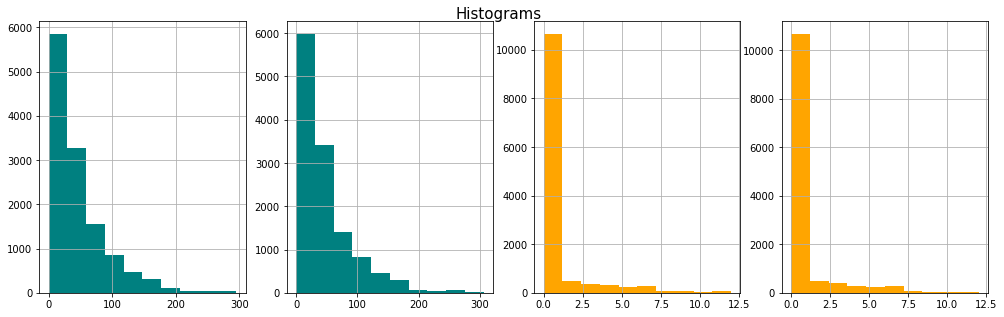

In [7]:
# Histograms showing the numeric variables distributions 

fig, (hist1,hist2, hist3,hist4) = plt.subplots(1,4, figsize=(17, 5))
plt.suptitle('Histograms', fontsize = 15, y = 0.92, color = 'black')
data['BlueCars_taken_sum'].hist(ax=hist1, color = "teal")
data['BlueCars_returned_sum'].hist(ax=hist2, color = "teal")
data['Slots_freed_sum'].hist(ax=hist3, color = "orange")
data['Slots_taken_sum'].hist(ax=hist4, color = "orange")


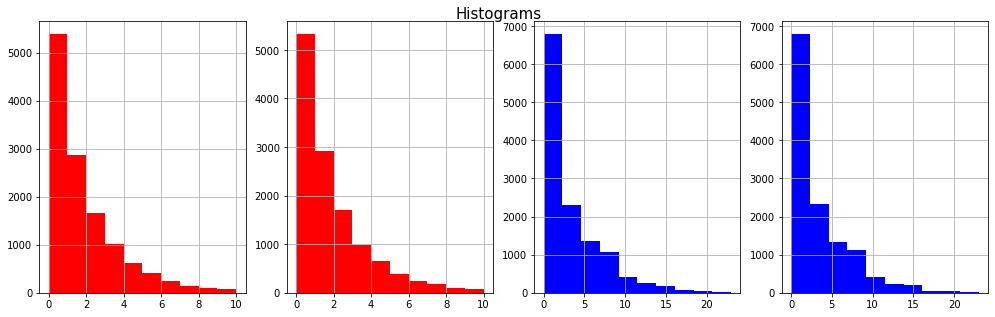

In [8]:
fig, (hist1,hist2, hist3,hist4) = plt.subplots(1,4, figsize=(17, 5))
plt.suptitle('Histograms', fontsize = 15, y = 0.92, color = 'black')
data['Utilib_taken_sum'].hist(ax=hist1, color = "red")
data['Utilib_returned_sum'].hist(ax=hist2, color = "red")
data['Utilib_14_taken_sum'].hist(ax=hist3, color = "blue")
data['Utilib_14_returned_sum'].hist(ax=hist4, color = "blue")
 

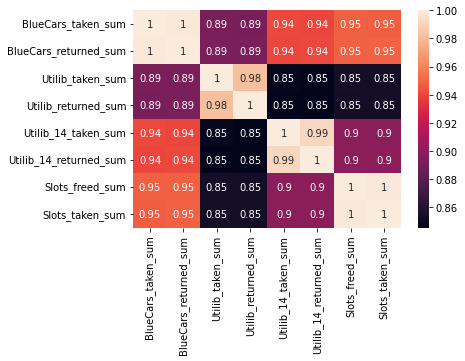

In [9]:
sns.heatmap(numeric_variables.corr(),annot=True)
plt.show()

The heat map shows us how the numeric variables correlate to each other. 
Correlation coefficients between -.20 and .20 are generally considered weak, between .20 and .50 (positive or negative) are considered moderate,and above .50 (positive or negative) are considered strong.
The correlations are also color-coded. The stronger the correlation, the lighter the color shade.

## **Categorical Variables**

In [10]:

# Changing day of week variable to a categorical variable
data['dayOfWeek'] = pd.Categorical(data.dayOfWeek)

# Checking which categories are there
data['dayOfWeek'].unique()

# There are 7 categories representing the 7 days of the week

# Checking the unique categories under day_type
data['day_type'].unique()

# There are 2, weekday and weekend

# Frequency table to see how the days of the week are categorized under day type

pd.crosstab(data['day_type'],data['dayOfWeek'])

# This shows that day of the week = 0 is Monday



dayOfWeek,0.0,1.0,2.0,3.0,4.0,5.0,6.0
day_type,,,,,,,
weekday,1873,1880,1775,1779,1769,0,0
weekend,0,0,0,0,0,1739,1748


In [11]:
# Checking which day of the week the blue cars were taken most

pd.crosstab(data['dayOfWeek'],data['BlueCars_taken_sum'].mean())

# As per the frequency table, the 2nd day had most blue cars taken with a record of 1880 cars

col_0,46.971026
dayOfWeek,
0.0,1873
1.0,1880
2.0,1775
3.0,1779
4.0,1769
5.0,1739
6.0,1748


## **Hypothesis Testing**

### **Problem Statement**

Ho: Blue cars taken in area with Postal code 95880 are equal to those taken in area with Postal code 91330 on weekdays  (Ho: u1=u2)

H1: in area with Postal code 95880 are not equal to those taken in area with Postal code 91330 on weekdays (Ha: u1 != u2)

This would help the business know if the two areas have the same demand and thus they can have similar marketing strategies

In [12]:
# Since we're only considering the weekdays, we shall exclude weekends from our data

df = data[data['day_type']== 'weekday']

In [15]:
# We create two groups of different postal code, similar in size
# Now our dataset has 9076 entries

# We'll now group the data as bluecars taken in postal code 75001 and those taken in Postal code 91330 and sample 50 entries randomly.

grp1 = df[df['Postal code'] == 95880].sample(50)
grp2 = df[df['Postal code']== 91330].sample(50)

In [16]:
# Now to get the mean and standard deviation of the cars taken in each group 

grp1_mean = grp1['BlueCars_taken_sum'].mean()
grp1_std = grp1['BlueCars_taken_sum'].std()



grp2_mean = grp2['BlueCars_taken_sum'].mean()
grp2_std = grp2['BlueCars_taken_sum'].std()
grp1.shape

(50, 13)

In [30]:
# Using z-test since samples > 30

ztest ,pval = stests.ztest(grp1['Postal code'], x2=grp2['Postal code'], value=0, alternative='two-sided')

print("p-value is:", pval)

if pval<0.05:
    print("Since the p-value is <5%, we reject the null hypothesis")
else:
    print("Since the p-value is >5%, we fail to reject the null hypothesis")

p-value is: 0.0
Since the p-value is <5%, we reject the null hypothesis


/usr/local/lib/python3.7/dist-packages/statsmodels/stats/weightstats.py:746: RuntimeWarning: divide by zero encountered in double_scalars
  zstat = (value1 - value2 - diff) / std_diff


Since we have rejected the null hypothesis, we now know that the two areas have different demand and therefore the marketing strategies in those areas have to differ depending on the resident's needs and lifestyles.